In [2]:
from __future__ import print_function
import numpy as np  
import h5py
import matplotlib.pyplot as plt  

import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Conv1D, MaxPooling2D, Activation, LSTM, Reshape, Convolution2D, BatchNormalization
from keras import backend as K
from IPython.display import Audio
from IPython.display import display
import sys
from ipykernel import kernelapp as app
%matplotlib inline

Using TensorFlow backend.


In [3]:
!ls

CQT300secsallsongs.h5  LastModel.pt  cqt_main.py      manuenv
FINAL.ipynb	       MODEL.ipynb   finalDatasetCQT  mfcc_main.py


In [4]:
#Loading all the necessary data of the dataset

filename = "CQT300secsallsongs.h5"

hf = h5py.File(filename, 'r') 
all_groups = list(hf)

In [5]:
fs = 44100      # samples/second
#train_data = np.load(open('../musicnet.npz','rb'))
#X,Y = train_data['2494'] # data X and labels Y for recording id 1788
window_size = 384  # 2048-sample fourier windows
wps = fs/float(512) # ~86 windows/second
seconds = 20

train_samples = 25
#test_samples = 20

#compute the number of windows

with h5py.File(filename) as file:

    size = 0
    for i in range(train_samples):
        iterations = file[all_groups[i]]['Labels'].shape[0]
        size += iterations
    
    x_train = np.empty([int(size), 5, window_size]) #, dtype=np.complex)
    y_train = np.empty([int(size),88])


    #size = 0
    #for i in range(test_samples):
    #    iterations = file[all_groups[i + train_samples]]['Labels'].shape[0]
    #    size += iterations
    #    
    #    
    #x_test = np.empty([int(size), 5, window_size]) #, dtype=np.complex)
    #y_test = np.empty([int(size),88])

    
print(x_train.shape)
#print(x_test.shape)

(634960, 5, 384)


/vol/customopt/lamachine.stable/lib/python3.6/site-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  del sys.path[0]


In [15]:
maximo = 0
with h5py.File(filename) as file:
    for i in tqdm(range(len(all_groups))):
        maximo = max(maximo, np.max(file[all_groups[i]]['CQT']))

/vol/customopt/lamachine.stable/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
100%|██████████| 318/318 [01:34<00:00,  3.35it/s]


In [16]:
maximo

41.77573207375742

In [6]:
from tqdm import tqdm
with h5py.File(filename) as file:
    
    print("Starting loading train samples")
    position = 0
    for i in tqdm(range(train_samples)):
        iterations = file[all_groups[i]]['Labels'].shape[0]
        iterations = int(iterations)
        for j in range(iterations):
          if position < x_train.shape[0]:
            
            if j == 0:
  
              for k in range(5):
                  if (j + k) < iterations:
                      x_train[position][k] = file[all_groups[i]]['CQT'][j + k]
              if j < (iterations - 2):
                  y_train[position] = file[all_groups[i]]['Labels'][j + 2]
              position = position + 1
            else:
              for k in range(5):
                  if (j + k) < iterations:
                      if k < 3:
                        x_train[position][k] = x_train[position - 1][k + 1]
                      else:
                        x_train[position][k] = file[all_groups[i]]['CQT'][j + k]
              if j < (iterations - 2):
                  y_train[position] = file[all_groups[i]]['Labels'][j + 2]
              position = position + 1
              
              
              
    #position = 0
    #for i in range(test_samples):
    #    print(i)
    #    iterations = file[all_groups[i + train_samples]]['Labels'].shape[0]
    #    iterations = int(iterations)
    #    for j in range(iterations):
    #      if position < x_test.shape[0]:
    #        
    #        if j == 0:
  #
    #          for k in range(5):
    #              if (j + k) < iterations:
    #                  x_test[position][k] = file[all_groups[i]]['CQT'][j + k]
    #          if j < (iterations - 2):
    #              y_test[position] = file[all_groups[i + train_samples]]['Labels'][j + 2]
    #          position = position + 1
    #        else:
    #          for k in range(5):
    #              if (j + k) < iterations:
    #                  if k < 3:
    #                    x_test[position][k] = x_test[position - 1][k + 1]
    #                  else:
    #                    x_test[position][k] = file[all_groups[i]]['CQT'][j + k]
    #          if j < (iterations - 2):
    #              y_test[position] = file[all_groups[i + train_samples]]['Labels'][j + 2]
    #          position = position + 1

/vol/customopt/lamachine.stable/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
  0%|          | 0/25 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 25/25 [10:24<00:00, 24.99s/it]


In [0]:
x_train == x_train2

In [7]:
y_train = y_train.astype('int')
#y_test = y_test.astype('int')
print("Finished convertion to Int")


test_max = 41.77573207375742
train_max = 41.77573207375742
print("Finished calculation of the maximum values")



x_train /= max_value
#x_test /= max_value


data_rows, data_cols = 5, window_size

x_train = x_train.reshape(x_train.shape[0], data_rows, data_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], data_rows, data_cols, 1)
print("Finished reshaping")
input_shape = (data_rows, data_cols, 1)

Finished convertion to Int
Finished calculation of the maximum values
0 24.05833589529093 24.05833589529093
Finished reshaping


In [0]:
print(x_train.shape, 'x train shape')
print(x_test.shape, 'x test shape')
print(y_train.shape, 'y train shape')
print(y_test.shape, 'y test shape')

(258400, 5, 384, 1) x train shape
(103360, 5, 384, 1) x test shape
(258400, 88) y train shape
(103360, 88) y test shape


In [8]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 11),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 11), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(88, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=512,
          epochs=10,
          verbose=1,
          validation_split=0.2)


#score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])


print(history.history.keys())  
   
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 374, 64)        2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 364, 64)        135232    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 182, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 182, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11648)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1491072   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

NameError: name 'score' is not defined

In [19]:
from tqdm import tqdm

train_samples = 20
current = 0

with h5py.File(filename) as file:
    
    while current < (len(all_groups) -20 ):
        
        
        size = 0
        for i in range(train_samples):
            iterations = file[all_groups[i + current]]['Labels'].shape[0]
            size += iterations

        x_train = np.empty([int(size), 5, window_size]) #, dtype=np.complex)
        y_train = np.empty([int(size),88])


        print("Starting loading train samples")
        position = 0
        for i in tqdm(range(train_samples)):
            iterations = file[all_groups[i + current]]['Labels'].shape[0]
            iterations = int(iterations)
            for j in range(iterations):
              if position < x_train.shape[0]:

                if j == 0:

                  for k in range(5):
                      if (j + k) < iterations:
                          x_train[position][k] = file[all_groups[i+current]]['CQT'][j + k]
                  if j < (iterations - 2):
                      y_train[position] = file[all_groups[i+current]]['Labels'][j + 2]
                  position = position + 1
                else:
                  for k in range(5):
                      if (j + k) < iterations:
                          if k < 3:
                            x_train[position][k] = x_train[position - 1][k + 1]
                          else:
                            x_train[position][k] = file[all_groups[i+current]]['CQT'][j + k]
                  if j < (iterations - 2):
                      y_train[position] = file[all_groups[i+current]]['Labels'][j + 2]
                  position = position + 1

        x_train /= max_value
        x_train = x_train.reshape(x_train.shape[0], data_rows, data_cols, 1)       

        history = model.fit(x_train, y_train,
              batch_size=512,
              epochs=1,
              verbose=1,
              validation_split=0.2)
        
        current += 16

/vol/customopt/lamachine.stable/lib/python3.6/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [09:03<00:00, 27.16s/it]


Train on 405236 samples, validate on 101310 samples
Epoch 1/1
405236/405236 [==============================] - 689s 2ms/step - loss: 173778673.2405 - accuracy: 0.0207 - val_loss: 732211845.2913 - val_accuracy: 0.0027


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [09:19<00:00, 27.99s/it]


Train on 412811 samples, validate on 103203 samples
Epoch 1/1
412811/412811 [==============================] - 695s 2ms/step - loss: 1955636459.5686 - accuracy: 0.0207 - val_loss: 958233238.2270 - val_accuracy: 0.0142


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [08:56<00:00, 26.80s/it]


Train on 400036 samples, validate on 100009 samples
Epoch 1/1
400036/400036 [==============================] - 591s 1ms/step - loss: 1690269954.2872 - accuracy: 0.0216 - val_loss: 7009499255.6155 - val_accuracy: 0.0339


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [08:38<00:00, 25.92s/it]


Train on 396918 samples, validate on 99230 samples
Epoch 1/1
396918/396918 [==============================] - 599s 2ms/step - loss: 11106032014.8337 - accuracy: 0.0279 - val_loss: 5480270232.0108 - val_accuracy: 0.0216


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [08:57<00:00, 26.85s/it]


Train on 393920 samples, validate on 98481 samples
Epoch 1/1
393920/393920 [==============================] - 596s 2ms/step - loss: 32228958582.9953 - accuracy: 0.0181 - val_loss: 74474762429.1178 - val_accuracy: 0.0234


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [08:48<00:00, 26.40s/it]


Train on 398659 samples, validate on 99665 samples
Epoch 1/1
398659/398659 [==============================] - 614s 2ms/step - loss: 118720942977.3598 - accuracy: 0.0180 - val_loss: 189593366987.5029 - val_accuracy: 0.0034


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [05:39<00:00, 16.99s/it]


Train on 263158 samples, validate on 65790 samples
Epoch 1/1
263158/263158 [==============================] - 398s 2ms/step - loss: 78666725402.9427 - accuracy: 0.0215 - val_loss: 3811838581.6223 - val_accuracy: 0.0030


  0%|          | 0/20 [00:00<?, ?it/s]

Starting loading train samples


100%|██████████| 20/20 [04:52<00:00, 14.64s/it]


Train on 232388 samples, validate on 58097 samples
Epoch 1/1
197632/232388 [========================>.....] - ETA: 49s - loss: 5241408086.2176 - accuracy: 0.0377

KeyboardInterrupt: 

In [0]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5,5),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (1, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(88, activation='sigmoid'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=512,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 384, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 384, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 5, 384, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 382, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 382, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 3, 382, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 191, 16)        0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


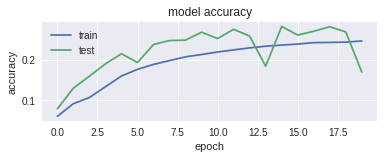

In [0]:
print(history.history.keys())  
   
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

In [0]:
with h5py.File(filename) as file:
  print(file[all_groups[0]]['CQT'][0].shape)

In [0]:
x_test[51000]
